# Using Median Household Income Data from LA County to visualize wealth stratification.
Does wealth stratification in LA County have any visual geospatial correlations with coast live oak locations? What are the intersections between wealth and access to green space, specifically green space with native flora like the coast live oak and live oak?

In [1]:
import pandas as pd
import geopandas as gpd

In [13]:
MHHIdf = pd.read_csv('Group Data/MHHI.csv')
MHHIdf.head()

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,6037199700,38892.0,1204,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241
1,6037199801,41027.0,903,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827
2,6037199802,42500.0,612,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225
3,6037199900,37232.0,845,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022
4,6037201110,65000.0,782,Low Income,Yes,No,Yes,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636


<Axes: ylabel='Frequency'>

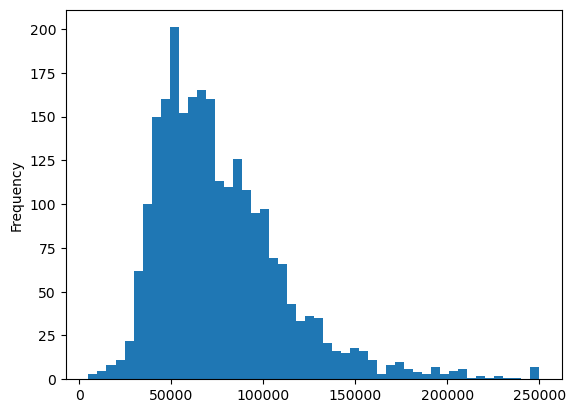

In [3]:
MHHIdf['med_hh_income'].plot.hist(bins=50)

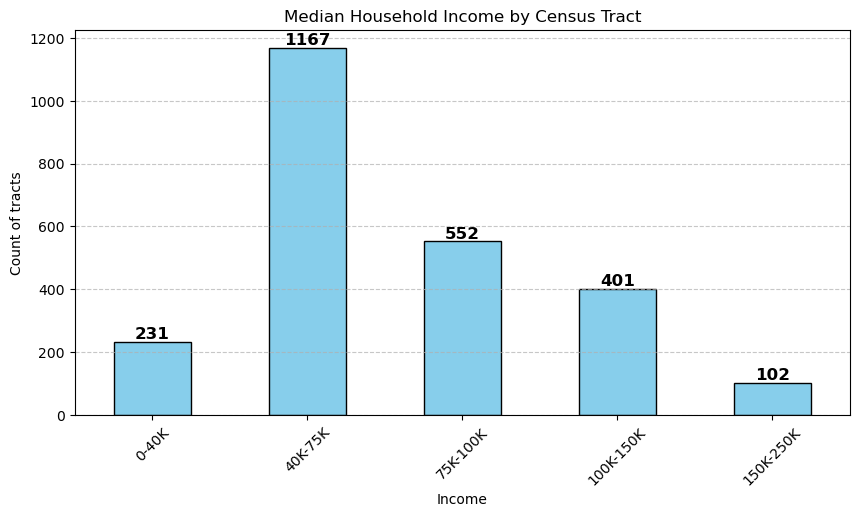

In [4]:
import matplotlib.pyplot as plt

# Define custom bins (adjust as needed)
custom_bins = [0, 40000, 75000, 100000, 150000, 250000]
bin_labels = ['0-40K', '40K-75K', '75K-100K', '100K-150K', '150K-250K']

# Assign data to bins
MHHIdf['income_bins'] = pd.cut(MHHIdf['med_hh_income'], bins=custom_bins, labels=bin_labels, include_lowest=True)

# Count occurrences in each bin
bin_counts = MHHIdf['income_bins'].value_counts().reindex(bin_labels)  # Ensure correct order

# Plot the data
plt.figure(figsize=(10, 5))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')

for i, count in enumerate(bin_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')


# Formatting
plt.xlabel('Income')
plt.ylabel('Count of tracts')
plt.title('Median Household Income by Census Tract')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Merging dataframes

In [5]:
tracts = gpd.read_file('Group Data/2020_Census_Tracts.geojson')

In [6]:
# create a FIPS column
tracts['FIPS'] ='6' + '037' + tracts['CT20']
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",6037101110
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",6037101122
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",6037101220
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",6037101221
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.2559, -118.28697 34.25...",6037101222


In [14]:
MHHIdf['tract'] = MHHIdf['tract'].astype(object) 
print(tracts['FIPS'].dtype)
print(MHHIdf['tract'].dtype)
MHHIdf['tract'] = MHHIdf['tract'].astype(str) 
tracts['FIPS'] = tracts['FIPS'].astype(str)

object
object


In [15]:
tracts_MHHI = tracts.merge(MHHIdf, left_on='FIPS', right_on='tract')
tracts_MHHI.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",6037101110,6037101110,74625.0,1505,Low Income,Yes,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2736,1.232981e+07,14765.649004
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",6037101122,6037101122,93125.0,1341,Low Income,No,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2737,2.908866e+07,30028.213771
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",6037101220,6037101220,55682.0,1430,Very Low Income,Yes,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2738,7.532651e+06,12504.552130
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",6037101221,6037101221,46274.0,1513,Very Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2739,3.874399e+06,8938.421349
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.2559, -118.28697 34.25...",6037101222,6037101222,30016.0,969,Extremely Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2740,3.090538e+06,9750.960420


### Mapping

<Axes: >

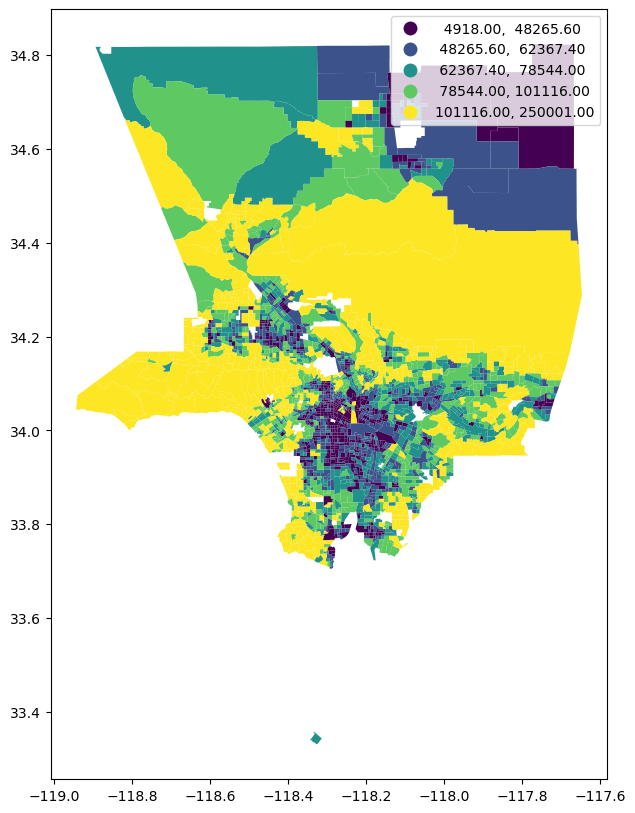

In [16]:
tracts_MHHI.plot(figsize=(12,10),
                 column='med_hh_income',
                 legend=True, 
                 scheme='quantiles')

###  Median household income and oak tree observations

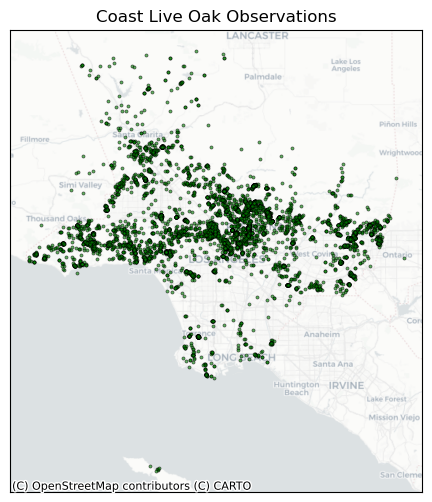

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

# Load dataset
df = pd.read_csv("Group Data/coastliveoaksobservations.csv") 


# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

# Convert to Web Mercator (EPSG:3857) for basemap compatibility
gdf = gdf.to_crs(epsg=3857)

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot individual observation points
gdf.plot(ax=ax, marker='o', color='green', markersize=5, alpha=0.6, edgecolor='black', linewidth=0.5)

# Add light gray basemap **after** plotting points
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.8)

# Formatting
ax.set_title("Coast Live Oak Observations")
ax.set_xticks([])  # Hide axis labels for a cleaner look
ax.set_yticks([])

# Save as PNG (optional)
plt.savefig("coast_live_oak_points.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

### Loop

I want to create a loop that distinguishes different income brackets. Next, I will include coast live oak observations with the different income brackets to visualize coast live oak density and income levels.

In [18]:
# Define custom bins and labels
custom_bins = [0, 40000, 75000, 100000, 150000, 250000]
bin_labels = ['0-40K', '40K-75K', '75K-100K', '100K-150K', '150K-250K']

# Apply binning to create a new column
tracts_MHHI["income_bracket"] = pd.cut(tracts_MHHI["med_hh_income"], bins=custom_bins, labels=bin_labels, right=True)

# Display first few rows to check
print(tracts_MHHI[["med_hh_income", "income_bracket"]].head())

   med_hh_income income_bracket
0        74625.0        40K-75K
1        93125.0       75K-100K
2        55682.0        40K-75K
3        46274.0        40K-75K
4        30016.0          0-40K


In [19]:
custom_bins = [0, 40000, 75000, 100000, 150000, 250000]
bin_labels = ['0-40K', '40K-75K', '75K-100K', '100K-150K', '150K-250K']

# Function to assign labels based on income
def assign_income_bracket(income):
    for i in range(len(custom_bins) - 1):  # Loop through bin ranges
        if custom_bins[i] <= income < custom_bins[i + 1]:  
            return bin_labels[i]
    return None  # If outside defined range

# Apply function using loop
income_brackets = []  # Create an empty list to store results
for index, row in tracts_MHHI.iterrows():
    income_brackets.append(assign_income_bracket(row["med_hh_income"]))

# Add new column to DataFrame
tracts_MHHI["income_bracket"] = income_brackets

# Display first few rows
print(tracts_MHHI[["med_hh_income", "income_bracket"]].head())

   med_hh_income income_bracket
0        74625.0        40K-75K
1        93125.0       75K-100K
2        55682.0        40K-75K
3        46274.0        40K-75K
4        30016.0          0-40K


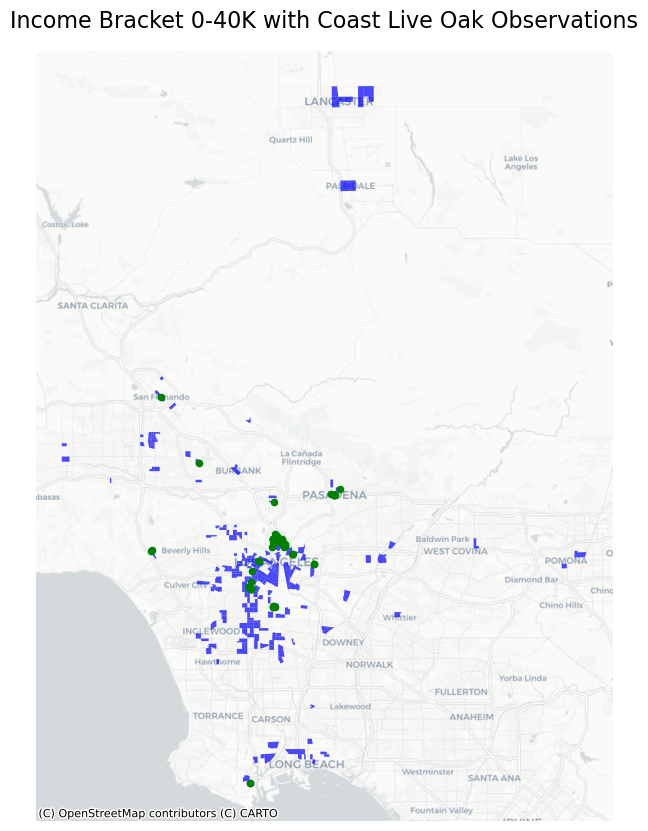

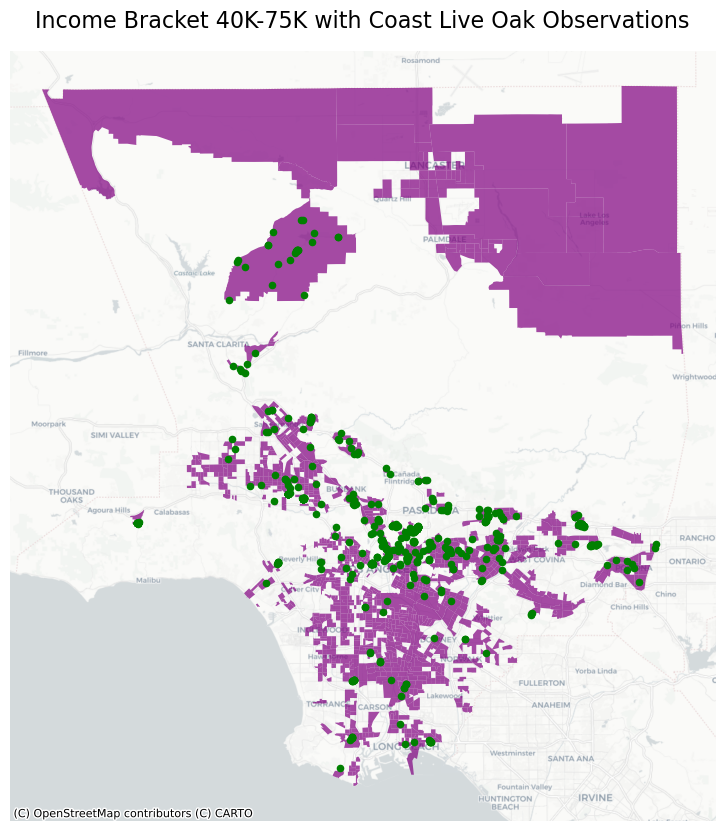

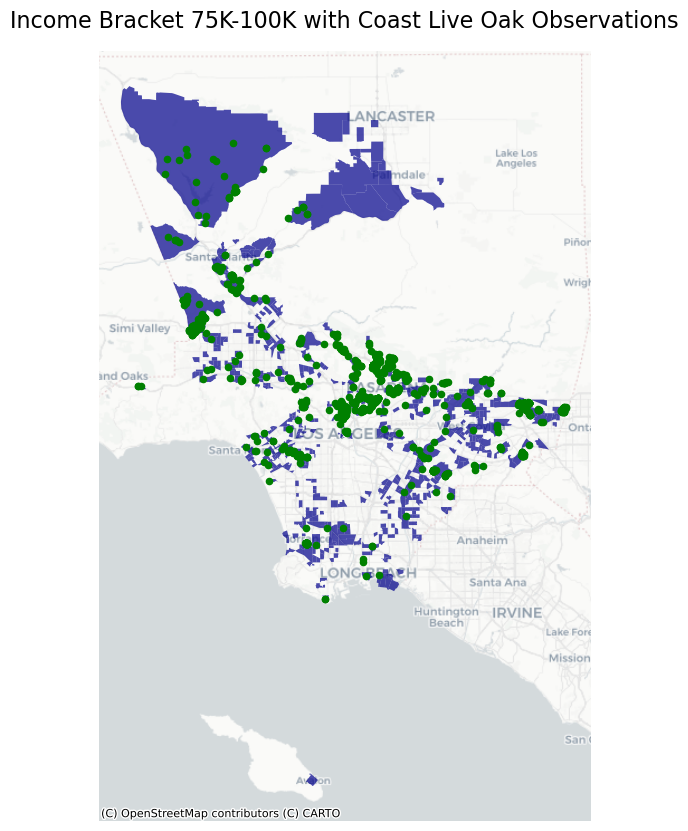

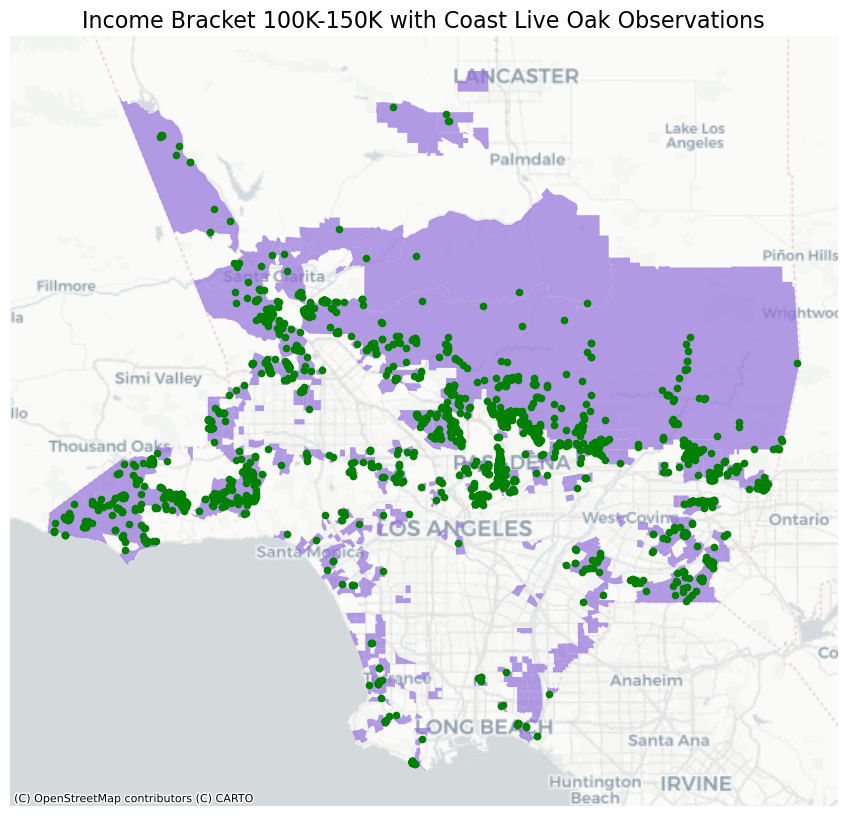

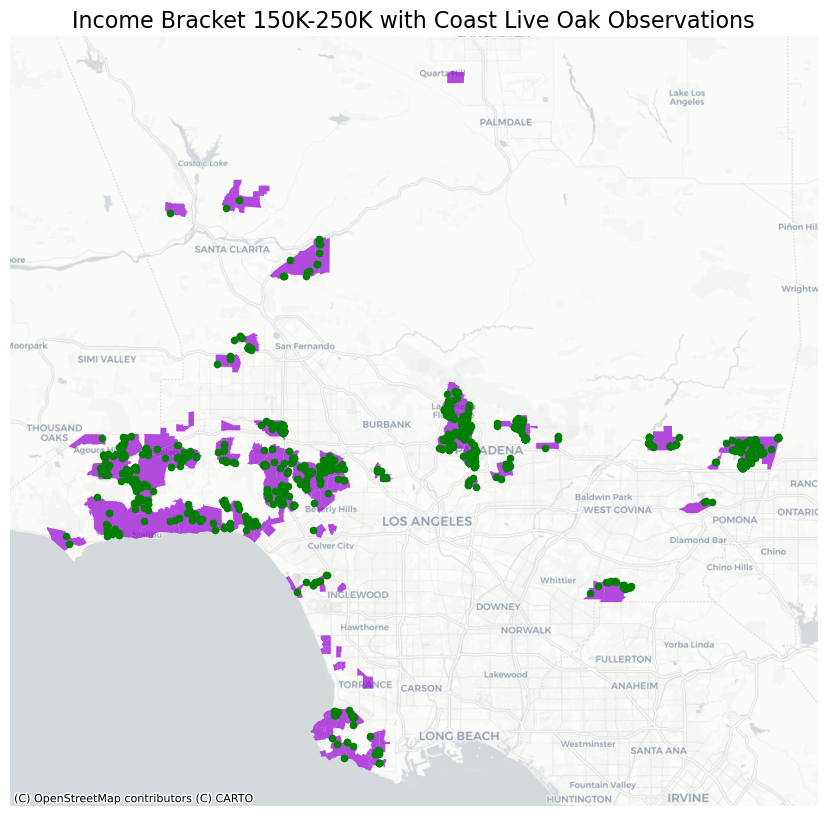

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

# Load income GeoJSON (census tract income data)
income_geojson = gpd.read_file("tracts_mhhi_geojson_output.geojson")

# Load Coast Live Oak observation data from CSV and convert to GeoDataFrame
df_oak = pd.read_csv("Group Data/coastliveoaksobservations.csv")
gdf_oak = gpd.GeoDataFrame(
    df_oak,
    geometry=gpd.points_from_xy(df_oak.longitude, df_oak.latitude),
    crs="EPSG:4326"
)

# Define custom bins and labels for median household income
custom_bins = [0, 40000, 75000, 100000, 150000, 250000]
bin_labels = ['0-40K', '40K-75K', '75K-100K', '100K-150K', '150K-250K']

# Function to assign an income bracket
def assign_income_bracket(income):
    for i in range(len(custom_bins) - 1):
        if custom_bins[i] <= income < custom_bins[i + 1]:
            return bin_labels[i]
    return None

# Create a new column with the income bracket in the income GeoDataFrame
income_geojson["income_bracket"] = income_geojson["med_hh_income"].apply(assign_income_bracket)

# Convert both GeoDataFrames to Web Mercator (EPSG:3857) for contextily
income_geojson = income_geojson.to_crs(epsg=3857)
gdf_oak = gdf_oak.to_crs(epsg=3857)

# Define a color mapping for each income bracket (blue-purple shades)
color_map = {
    '0-40K': 'blue',
    '40K-75K': 'purple',
    '75K-100K': 'darkblue',
    '100K-150K': 'mediumpurple',
    '150K-250K': 'darkviolet'
}

# Loop over each income bracket, create and display a map
for label in bin_labels:
    # Filter income polygons for the current income bracket
    subset = income_geojson[income_geojson["income_bracket"] == label]
    
    # Use a spatial join to filter Coast Live Oak observations within these polygons
    if not subset.empty:
        oak_subset = gpd.sjoin(gdf_oak, subset, how='inner', predicate='within')
    else:
        oak_subset = gdf_oak.iloc[0:0]  # empty GeoDataFrame if no polygon exists for this bracket

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot the income polygons for the current bracket 
    if not subset.empty:
        subset.plot(ax=ax, color=color_map[label], edgecolor=None, alpha=0.7)
    
    # Overlay the Coast Live Oak points 
    if not oak_subset.empty:
        oak_subset.plot(ax=ax, marker='o', color='green', markersize=20, label="Coast Live Oak")
    
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    
    ax.axis('off')
    ax.set_title(f"Income Bracket {label} with Coast Live Oak Observations", fontsize=16)
    
    plt.show()